In [5]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
#NLP libraries 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Download the required NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhammadkamdar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/muhammadkamdar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muhammadkamdar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
news_df = pd.read_pickle('news.pkl')
news_df['date'] = pd.to_datetime(news_df['date'])

# Set 'date' column as the DataFrame's index
news_df.set_index('date', inplace=True)

In [7]:
news_df

,datetime,news_url,title,text,source_name,sentiment,type,article_title,article_text,article_summary
date,,,,,,,,,,
2021-01-02,"Sat, 02 Jan 2021 13:00:15 -0500",https://dailyhodl.com/2021/01/02/crypto-analys...,Crypto Analyst Michaël van de Poppe Unveils Bi...,Widely-followed trader and crypto strategist M...,The Daily Hodl,Neutral,Article,Crypto Analyst Michaël van de Poppe Unveils Bi...,Widely-followed trader and crypto strategist M...,Widely-followed trader and crypto strategist M...
2021-01-02,"Sat, 02 Jan 2021 10:04:44 -0500",https://cryptodaily.co.uk/2021/01/btc-usd-test...,BTC/USD Tests 31609 Technical Resistance: Sall...,Bitcoin (BTC/USD) rampaged higher early in tod...,Crypto Daily,Positive,Article,BTC/USD Tests 31609 Technical Resistance: Sall...,Bitcoin (BTC/USD) rampaged higher early in tod...,A series of Stops were then elected above upsi...
2021-01-02,"Sat, 02 Jan 2021 11:00:38 -0500",https://www.coindesk.com/more-aussies-back-bit...,"More Aussies Back Bitcoin, the Underdog",Aussie resilience (and bitcoin) binds us toget...,Coindesk,Positive,Article,"More Aussies Back Bitcoin, the Underdog","To me, this is a classic example of that iconi...","To me, this is a classic example of that iconi..."
2021-01-02,"Sat, 02 Jan 2021 11:32:11 -0500",https://cointelegraph.com/news/how-massive-bit...,How massive Bitcoin buyer activity on Coinbase...,"The price of Bitcoin surged past $32,000 as bu...",Cointelegraph,Positive,Article,How massive Bitcoin buyer activity on Coinbase...,Coinbase has seen a large spike in buyer activ...,Coinbase has seen a large spike in buyer activ...
2021-01-02,"Sat, 02 Jan 2021 11:47:14 -0500",https://bitcoinist.com/3-key-reasons-why-bitco...,3 Key Reasons Why Bitcoin Price Just Exploded ...,"Bitcoin moves past $23,500 for the first time ...",Bitcoinist,Positive,Article,3 Key Reasons Why Bitcoin Price Just Exploded ...,"Bitcoin moves past $33,500 for the first time ...","Bitcoin moves past $33,500 for the first time ..."
...,...,...,...,...,...,...,...,...,...,...
2021-07-19,"Mon, 19 Jul 2021 06:32:03 -0400",https://cryptopotato.com/nearly-70-of-would-ho...,Nearly 70% of Would HODL Bitcoin if it Drops B...,More than 65% of survey participants said they...,CryptoPotato,Negative,Article,Nearly 70% Would HODL Bitcoin if it Drops Belo...,Nearly 70% of current bitcoin holders are prep...,Nearly 70% of current bitcoin holders are prep...
2021-07-19,"Mon, 19 Jul 2021 06:36:00 -0400",https://coinidol.com/bitcoin-31000-downtrend/,"Bitcoin Finds Support Above $31,000; Can It Re...",Bitcoin (BTC) price has been trading above $31...,Coin Idol,Neutral,Article,"Bitcoin Finds Support Above $31,000; Can It Re...","Jul 19, 2021 at 10:36 // News\n\nCoin Idol Aut...","Jul 19, 2021 at 10:36 // NewsCoin Idol AuthorB..."
2021-07-19,"Mon, 19 Jul 2021 05:43:35 -0400",https://www.forbes.com/sites/cryptoconfidentia...,"Bitcoin Slides Toward $30,000 | New Crypto Fun...",Bitcoin stalls as Binance faces more regulator...,Forbes,Negative,Article,"Bitcoin Slides Toward $30,000 | New Crypto Fun...",BITCOIN STALLS AS BINANCE FACES MORE REGULATOR...,BITCOIN STALLS AS BINANCE FACES MORE REGULATOR...


In [8]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

Polarity: 0.8516


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/muhammadkamdar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
sia = SentimentIntensityAnalyzer()
def sentiment_polarity(text):
    sentiment_scores = sia.polarity_scores(text)

    # Extract polarity score
    polarity = sentiment_scores['compound']
    return polarity

In [10]:
news_df['preprocessed_text'] = news_df['article_text'].apply(lambda x: x.lower())
news_df['sentiment_polarity'] = news_df['preprocessed_text'].apply(sentiment_polarity)
news_df['sentiment'] = (news_df['sentiment_polarity'] + 1) / 2

In [11]:
news_polarity = news_df['sentiment']
news_polarity = news_polarity.groupby([pd.Grouper(freq='D')]).mean().reset_index()


In [12]:
news_polarity.to_csv('polarity.csv')

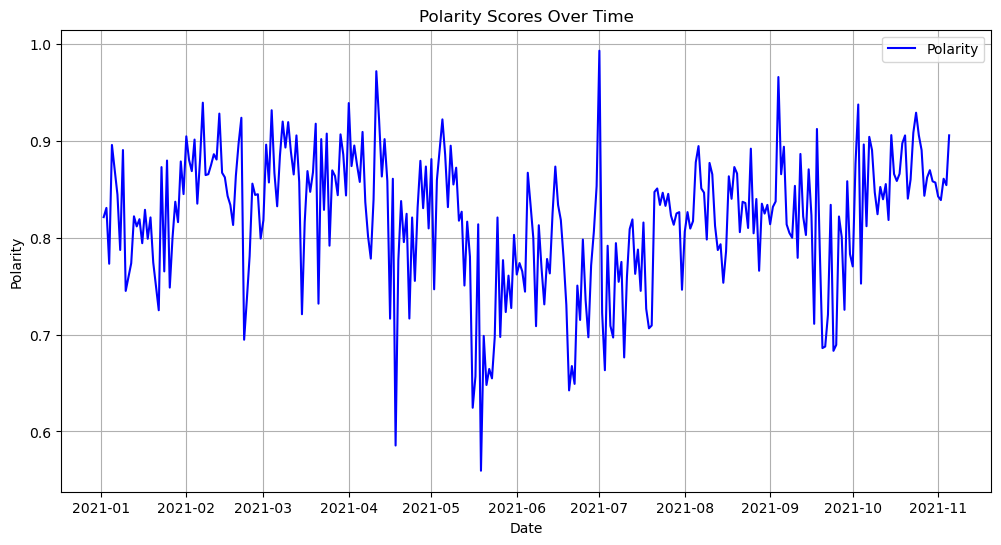

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(news_polarity['date'], news_polarity['sentiment'], label='Polarity', color='blue')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.title('Polarity Scores Over Time')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

In [7]:
news_df['preprocessed_text'] = news_df['article_text'].apply(lambda x: x.lower())

# Step 2: Sentiment Analysis using TextBlob
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

news_df['sentiment_polarity'] = news_df['preprocessed_text'].apply(get_sentiment_polarity)

# Step 3: Normalize polarity to the range [0, 1]
# (Assuming the sentiment polarity ranges from -1 to 1, you can normalize it to [0, 1] as follows)
news_df['sentiment'] = (news_df['sentiment_polarity'] + 1) / 2


In [13]:
news_polarity

,date,sentiment
0,2021-01-02,0.821239
1,2021-01-03,0.830783
2,2021-01-04,0.773108
3,2021-01-05,0.895751
4,2021-01-06,0.870505
...,...,...
303,2021-11-01,0.842612
304,2021-11-02,0.838837
305,2021-11-03,0.860868
306,2021-11-04,0.854249


In [ ]:
news_polarity.to_csv('polarity.csv')

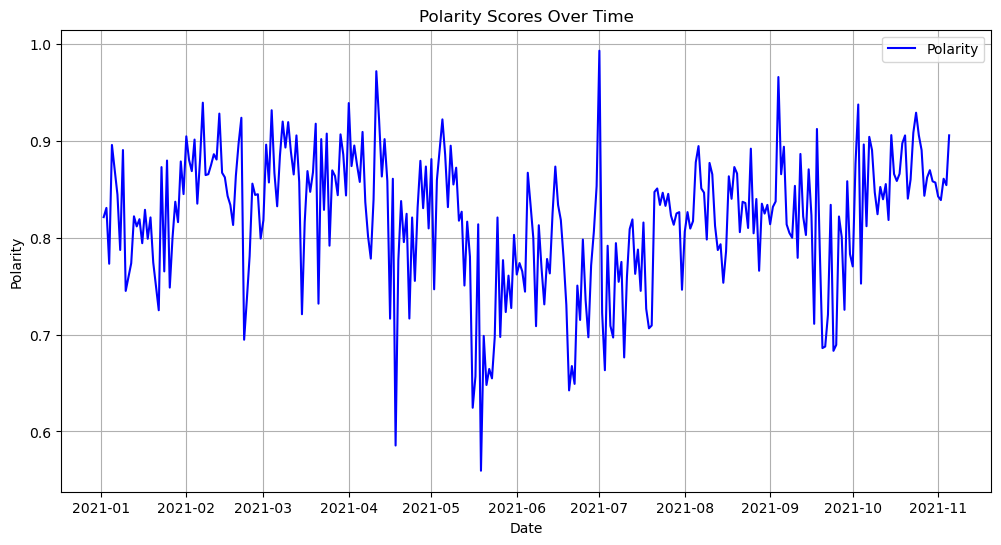

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(news_polarity['date'], news_polarity['sentiment'], label='Polarity', color='blue')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.title('Polarity Scores Over Time')
plt.grid(True)
plt.legend()
plt.savefig('polarity_chart.png')
# Display the plot
plt.show()

In [135]:
news_df['polarity'].max()

1.0

In [142]:
polarity = news_df['polarity'].reset_index()

In [129]:
polarity = polarity.groupby([pd.Grouper(freq='D')]).mean().reset_index()


In [143]:
polarity

,date,polarity
0,2021-01-02,0.097835
1,2021-01-02,0.038976
2,2021-01-02,0.160714
3,2021-01-02,0.061160
4,2021-01-02,0.137258
...,...,...
23907,2021-07-19,0.020870
23908,2021-07-19,0.030657
23909,2021-07-19,0.024268
23910,2021-07-20,0.060123


In [71]:
daily_sentiment = news_df.groupby('date')['polarity'].mean().reset_index()

In [77]:
daily_sentiment['polarity'].max()

0.110250334750413

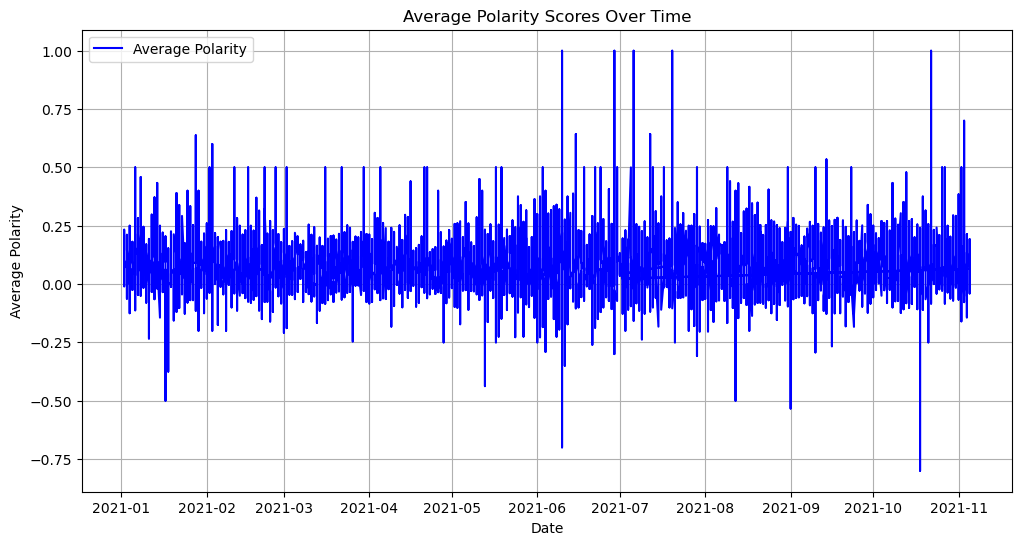

In [144]:
plt.figure(figsize=(12, 6))
plt.plot(polarity['date'], polarity['polarity'], label='Average Polarity', color='blue')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.title('Average Polarity Scores Over Time')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

In [122]:
df1 = pd.read_pickle('news_corpus_predict.pkl')
df2 = pd.read_pickle('news_corpus_110521.pkl')

In [123]:
df1

,datetime,news_url,title,text,source_name,sentiment,type,article_title,article_text,article_summary,polarity
date,,,,,,,,,,,
2021-06-07,"Mon, 07 Jun 2021 12:43:13 -0400",https://bitcoinist.com/this-time-its-different...,This Time It's Different: “Super” Signal Flips...,unfortunately super sounding technical indicat...,Bitcoinist,Negative,Article,This Time It’s Different: “Super” Signal Flips...,Where the king of cryptocurrency is in its cur...,"Unfortunately, a “super” sounding technical in...",0
2021-06-07,"Mon, 07 Jun 2021 11:59:32 -0400",https://www.thecryptoupdates.com/microstrategy...,MicroStrategy Declares A $400 Million Notes To...,microstrategy inc us based endeavor programmin...,TCU,Positive,Article,MicroStrategy Declares A $400 Million Notes To...,MicroStrategy Inc the US-based endeavor progra...,MicroStrategy Inc the US-based endeavor progra...,1
2021-06-07,"Mon, 07 Jun 2021 11:35:00 -0400",https://www.benzinga.com/markets/cryptocurrenc...,MicroStrategy Seeks $400M Via Institutional De...,fueling rise bitcoin beyond bitcoin futures et...,Benzinga,Positive,Article,MicroStrategy Seeks $400M Via Institutional De...,What Is Fueling The Rise Of Bitcoin Beyond The...,What Is Fueling The Rise Of Bitcoin Beyond The...,1
2021-06-07,"Mon, 07 Jun 2021 11:10:59 -0400",https://dailyhodl.com/2021/06/07/amid-plans-to...,"Amid Plans To Adopt BTC As Legal Tender, El Sa...",el salvador poised become world first sovereig...,The Daily Hodl,Positive,Article,"Amid Plans To Adopt BTC As Legal Tender, El Sa...",El Salvador is poised to become the world’s fi...,El Salvador is poised to become the world’s fi...,1
2021-06-07,"Mon, 07 Jun 2021 19:51:40 -0400",https://invezz.com/news/2021/06/07/square-plan...,Square plans to invest $5 million in a solar-p...,loves everything positive travelling extractin...,Invezz,Positive,Article,Square plans to invest $5 million in a solar-p...,Jinia is a cryptocurrency and blockchain enthu...,"She loves everything positive, travelling, and...",1
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-05,"Fri, 05 Nov 2021 12:58:00 -0400",https://cryptonews.com//news/still-upside-pote...,"Still Upside Potential in Bitcoin, While ETH F...",still upside potential bitcoin eth faces compe...,Cryptonews,Positive,Article,"Still Upside Potential in Bitcoin, While ETH F...","Still Upside Potential in Bitcoin, While ETH F...","Still Upside Potential in Bitcoin, While ETH F...",1
2021-11-05,"Fri, 05 Nov 2021 12:41:35 -0400",https://beincrypto.com/nyc-mayor-elect-says-he...,NYC Mayor-Elect Says He Will Take Three Months...,new york city mayor elect eric adams said woul...,BeInCrypto,Positive,Article,NYC Mayor-Elect Says He Will Take Three Months...,New York City mayor-elect Eric Adams said he w...,New York City mayor-elect Eric Adams said he w...,1
2021-11-05,"Fri, 05 Nov 2021 08:15:54 -0400",https://www.dcforecasts.com/bitcoin-news/squar...,Square Sees 23% Drop In Bitcoin Profits As Sto...,square sees drop bitcoin profits despite bitco...,DCForecasts,Negative,Article,Square Sees 23% Drop In Bitcoin Profits As Sto...,Square sees 23% drop in Bitcoin profits despit...,Square sees 23% drop in Bitcoin profits despit...,0
